In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #evaluation metrics for linear regression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

test = pd.read_csv("test.csv" )
train = pd.read_csv("train.csv" )

In [6]:
#Pre processing
test['test'] = 1
train['test'] = 0
df = pd.concat([train, test], axis=0)
df.head()

,id,date,store_nbr,family,sales,onpromotion,test
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,0


In [50]:
#data cleaning
df.isna().any()

id              False
date            False
store_nbr       False
family          False
sales           False
onpromotion     False
test            False
year            False
month           False
day             False
day_of_week     False
day_name        False
quarter         False
is_leap_year    False
dtype: bool

In [52]:
#removing the null values (we can replace them with mean value)
df=df.dropna(how='any')


In [13]:
#Data Engineering
def datetime(df):
    df['date'] = pd.to_datetime(df["date"])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.day_of_week
    df['day_name'] = df['date'].dt.day_name()
    df['quarter'] = df['date'].dt.quarter
    return df

In [14]:
df = datetime(df)


In [17]:
df.tail()

,id,date,store_nbr,family,sales,onpromotion,test,year,month,day,day_of_week,day_name,quarter,is_leap_year
28507,3029395,2017-08-31,9,POULTRY,NaN,1,1,2017,8,31,3,Thursday,3,False
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1,2017,8,31,3,Thursday,3,False
28509,3029397,2017-08-31,9,PRODUCE,NaN,1,1,2017,8,31,3,Thursday,3,False
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1,2017,8,31,3,Thursday,3,False
28511,3029399,2017-08-31,9,SEAFOOD,NaN,0,1,2017,8,31,3,Thursday,3,False


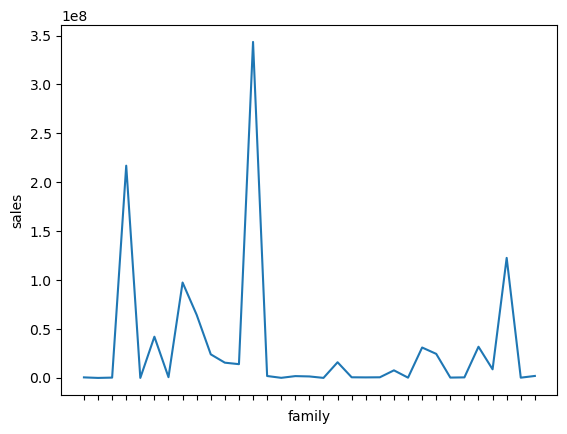

In [31]:
#EDA
grouped_data = df.groupby('family')['sales'].sum().reset_index()

sns.lineplot(data=grouped_data, x='family', y='sales')

ax = plt.gca()
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

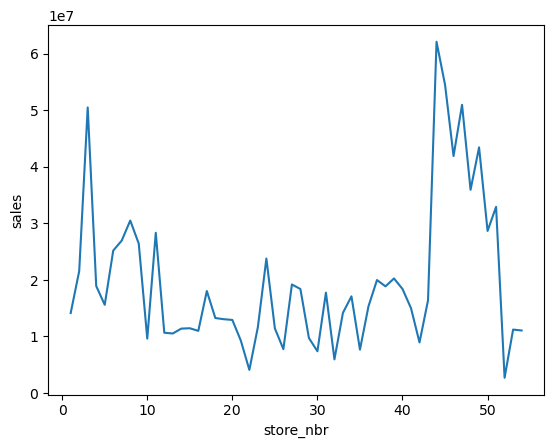

In [32]:
best_store = df.groupby('store_nbr')['sales'].sum().reset_index()

bs_sorted = best_store.sort_values(by='sales', ascending=False)

sns.lineplot(data=bs_sorted, x='store_nbr', y='sales')

In [22]:
pd.DataFrame(df.groupby('year')['sales'].sum()).reset_index().sort_values(by='sales', ascending=False)

,year,sales
3,2016,2.886545e+08
2,2015,2.408801e+08
1,2014,2.094742e+08
4,2017,1.942171e+08
0,2013,1.404190e+08


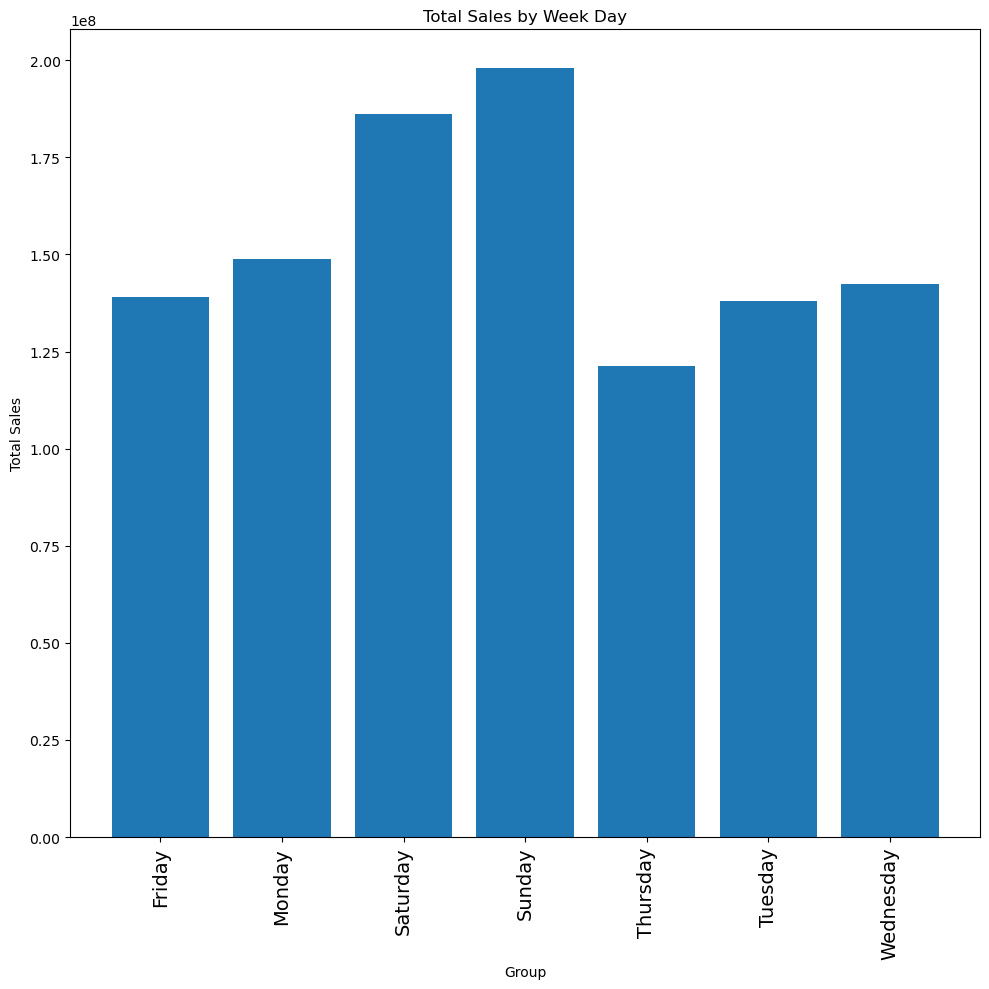

In [34]:
grouped_data = df.groupby(['day_name'])['sales'].sum()

grouped_data = grouped_data.reset_index()

plt.figure(figsize=(10, 10))
plt.bar(range(len(grouped_data)), grouped_data['sales'])
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Week Day')
plt.xticks(range(len(grouped_data)), grouped_data['day_name'], rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

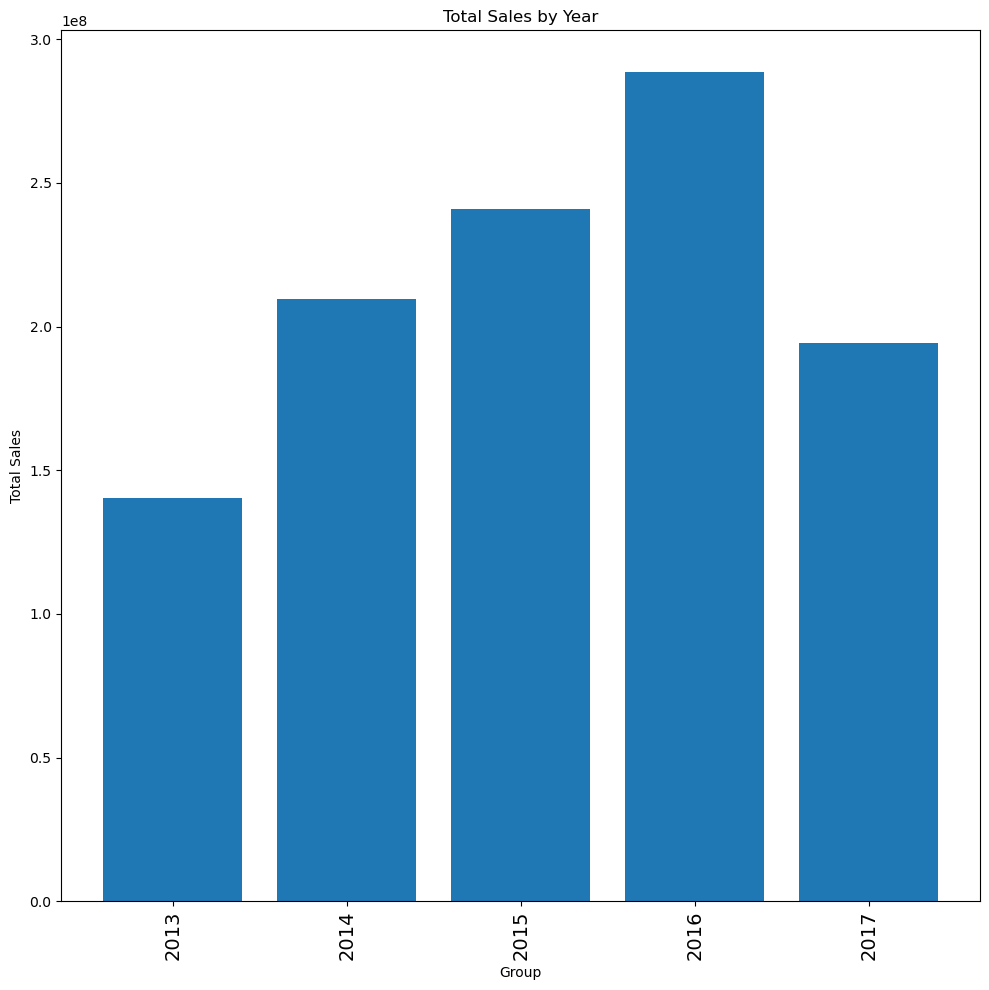

In [35]:
grouped_data = df.groupby(['year'])['sales'].sum()

grouped_data = grouped_data.reset_index()

plt.figure(figsize=(10, 10))
plt.bar(range(len(grouped_data)), grouped_data['sales'])
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(range(len(grouped_data)), grouped_data['year'], rotation=90, fontsize=14)
plt.tight_layout()
plt.show()